In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import wnfilter as wf
import sembrick as sb
import retrivedata as rd
import api 
import sepdata as sd
import core

### Get AccelTimeSeriesSeg

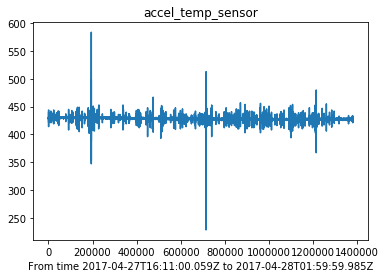

In [5]:
accel_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-2-readings.csv'

sensor_name = 'accel_temp_sensor'

accel_tss = rd.readAccelFromLocal(accel_file_name, sensor_name)

accel_tss.plotY()

In [6]:
accel_tss.getStartTime()

accel_tss.getEndTime()

'2017-04-28T01:59:59.985Z'

### Find time intervals of meaningful data recorded in accel sensor 

In [7]:

mngfl_time_interval_lst = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss, filter_type = 'threshold_121')


### Transfer it to MaskTimeSeriesSeg in AccelTimeSeriesSeg and visualize the mask

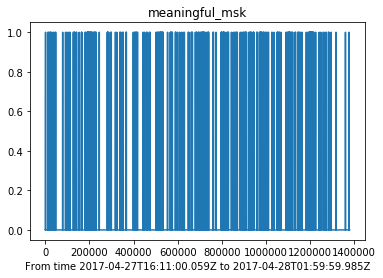

In [8]:
# Add Mask to the accelTimeSeriesSeg
msk_name = 'meaningful_msk'
accel_tss.addMaskByTimeIntervalLst(mngfl_time_interval_lst, msk_name)

accel_tss.getMaskByName(msk_name).plotY()

### Apply mask to get a list of meaningful AccelTimeSeriesSeg

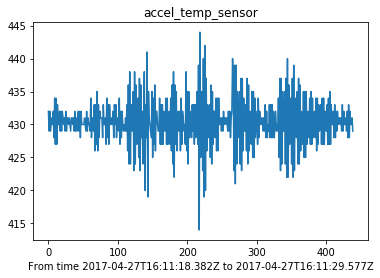

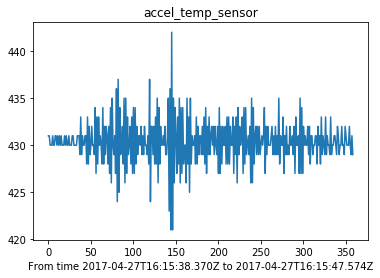

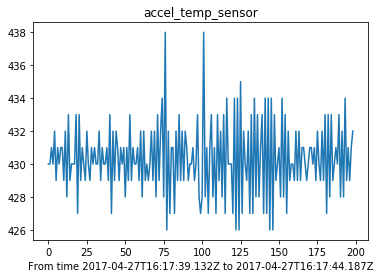

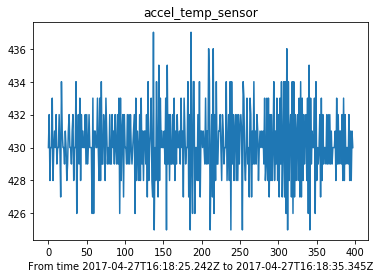

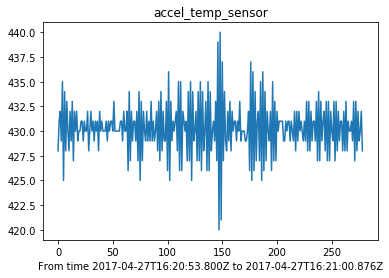

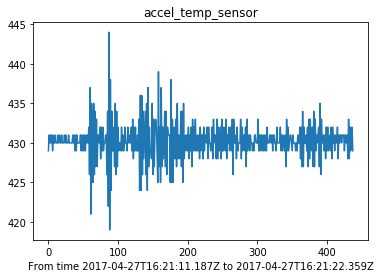

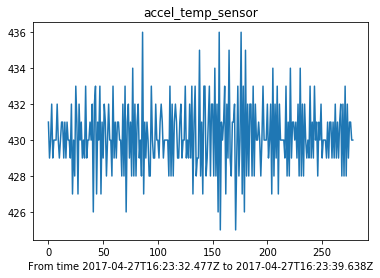

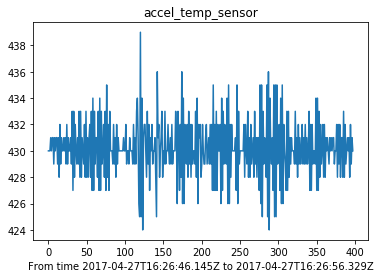

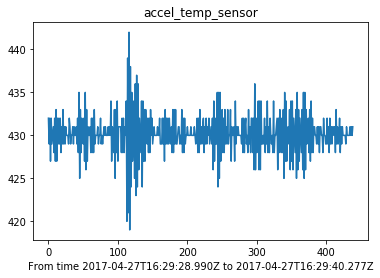

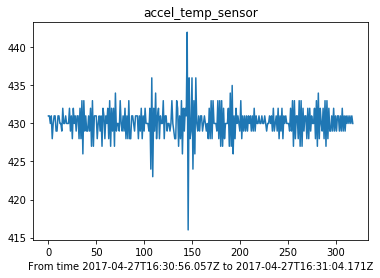

In [9]:
accel_mngfl_lst = accel_tss.applyMaskByName(msk_name)

for i in range(10):
    accel_mngfl_lst[i].plotY()


### Get strain gauge data

In [10]:
strain_file_name = './CsvData/pi-pier9-bridge-strain-1-right-s-0-readings.csv'
strain_sensor_name = 'pi-pier9-bridge-strain-1-right-s-0'
strain_tss = rd.readStrainFromLocal(strain_file_name, strain_sensor_name)


### Get meaingful strain gauge data from meaningful time interval list

In [11]:
strain_tss.addMaskByTimeIntervalLst(mngfl_time_interval_lst,msk_name)
strain_tss_lst = strain_tss.applyMaskByName(msk_name)

2017-04-27T18:11:15.390Z
2017-04-27T18:11:19.472Z


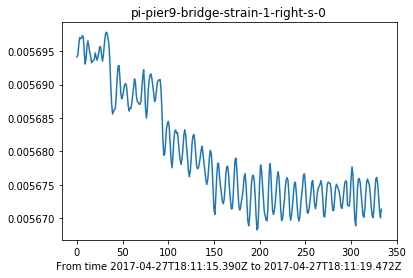


2017-04-27T18:11:41.014Z
2017-04-27T18:11:50.125Z


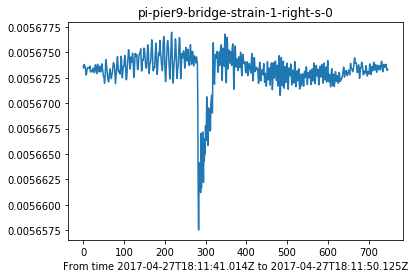


2017-04-27T18:11:59.189Z
2017-04-27T18:12:12.372Z


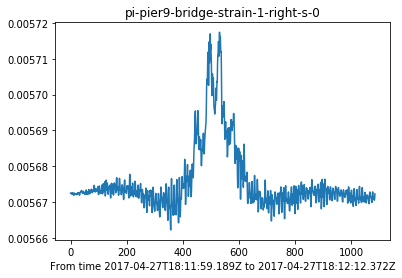


2017-04-27T18:13:40.352Z
2017-04-27T18:13:50.523Z


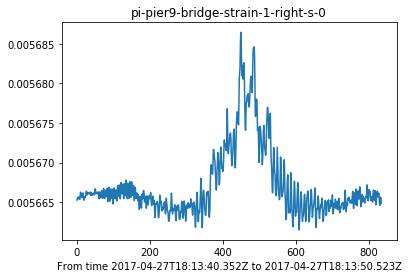


2017-04-27T18:17:33.963Z
2017-04-27T18:17:45.154Z


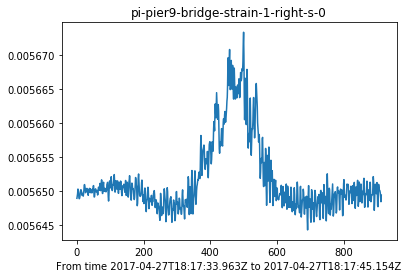


2017-04-27T18:18:36.342Z
2017-04-27T18:18:51.687Z


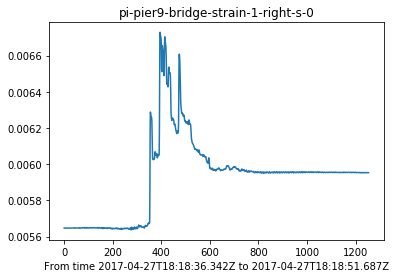


2017-04-27T18:26:41.525Z
2017-04-27T18:26:51.756Z


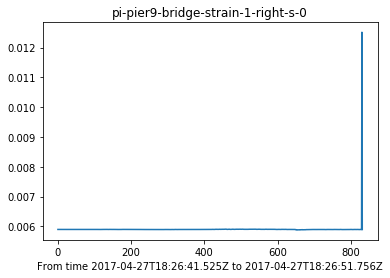


2017-04-27T18:29:33.485Z
2017-04-27T18:29:39.584Z


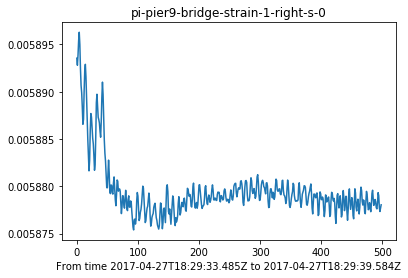


2017-04-27T18:35:24.340Z
2017-04-27T18:35:37.510Z


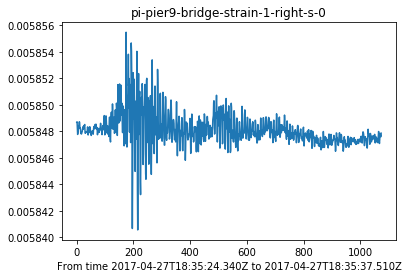


2017-04-27T18:36:09.355Z
2017-04-27T18:36:14.422Z


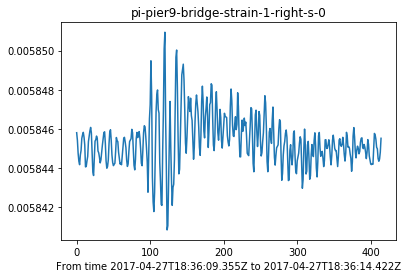

In [12]:
for i in range(10):
    print strain_tss_lst[i].getStartTime()
    print strain_tss_lst[i].getEndTime()
    strain_tss_lst[i].plotY()
    print 


### Take a union of meaningful time interval list from more than one accel data for deriving  a more completed meaningful time interval list

In [13]:
strain_file_name = './CsvData/pi-pier9-bridge-strain-1-right-s-0-readings.csv'

accel_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-2-readings.csv'


z2_data_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-2-readings.csv'

z1_data_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-1-readings.csv'

z4_data_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-4-readings.csv'



sensor_name = 'accel_temp_sensor'


'---------------------------------------------------------------------'


accel_tss_z1 = rd.readAccelFromLocal(z1_data_file_name, sensor_name)
mngfl_time_interval_lst_z1 = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss_z1, filter_type = 'threshold_121')


'---------------------------------------------------------------------'


accel_tss_z2 = rd.readAccelFromLocal(z2_data_file_name, sensor_name)
mngfl_time_interval_lst_z2 = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss_z2, filter_type = 'threshold_121')

'------------------------------------------------------------------'



accel_tss_z4 = rd.readAccelFromLocal(z4_data_file_name, sensor_name)
mngfl_time_interval_lst_z4 = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss_z4, filter_type = 'threshold_121')

'------------------------------------------------------------------'



time_interval_lst_all = core.mergeTimeIntervalLsts([
                                                    mngfl_time_interval_lst_z1,\
                                                    mngfl_time_interval_lst_z2,\
                                                    mngfl_time_interval_lst_z4
                                                   ])




### Get meaningful strain gauge data from the derived time interval list 

2017-04-27T18:11:13.276Z
2017-04-27T18:11:19.472Z


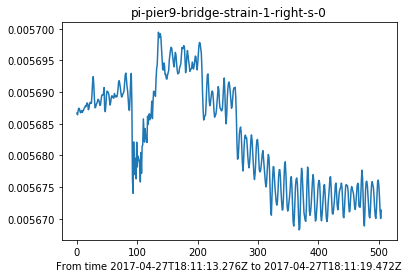


2017-04-27T18:11:41.014Z
2017-04-27T18:11:54.123Z


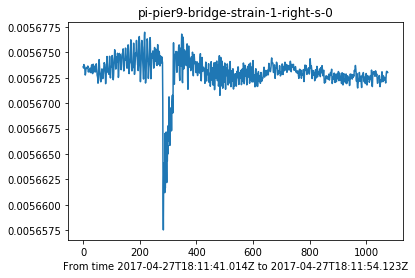


2017-04-27T18:11:58.193Z
2017-04-27T18:12:15.398Z


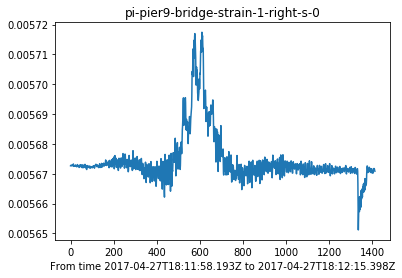


2017-04-27T18:13:40.352Z
2017-04-27T18:13:50.523Z


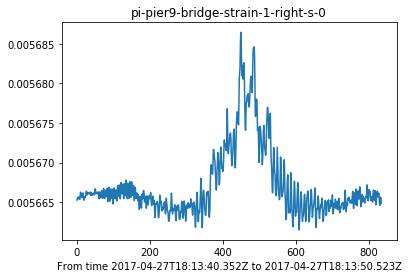


2017-04-27T18:17:33.963Z
2017-04-27T18:17:48.252Z


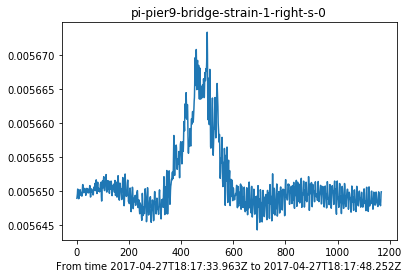


2017-04-27T18:18:36.342Z
2017-04-27T18:18:51.687Z


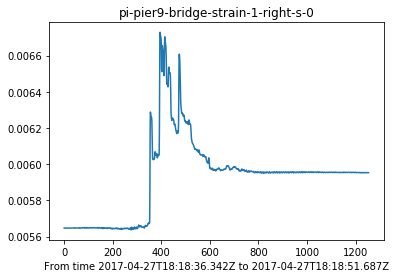


2017-04-27T18:26:41.525Z
2017-04-27T18:26:52.753Z


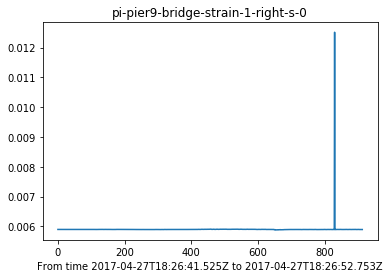


2017-04-27T18:29:31.468Z
2017-04-27T18:29:40.665Z


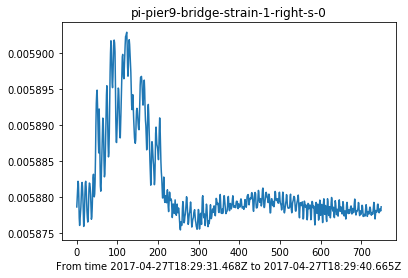


2017-04-27T18:35:24.340Z
2017-04-27T18:35:42.662Z


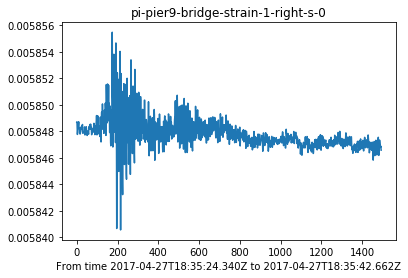


2017-04-27T18:36:09.355Z
2017-04-27T18:36:14.422Z


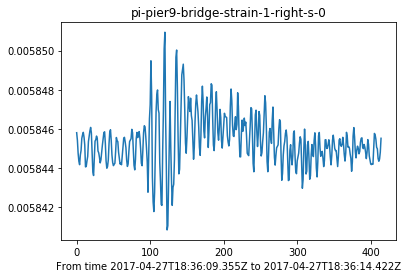

In [14]:
#Get strain tss data from the data base
strain_sensor_name = 'pi-pier9-bridge-strain-1-right-s-0'
strain_tss = rd.readStrainFromLocal(strain_file_name, strain_sensor_name)

strain_tss.addMaskByTimeIntervalLst(time_interval_lst_all,'occ_strain')
strain_tss_lst = strain_tss.applyMaskByName('occ_strain')

for i in range(10):
    print strain_tss_lst[i].getStartTime()
    print strain_tss_lst[i].getEndTime()
    strain_tss_lst[i].plotY()
    print 

### Take a union by adding MaskTimeSeriesSeg for deriving  a more completed meaningful time interval list

In [15]:


z2_data_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-2-readings.csv'

z1_data_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-1-readings.csv'

z4_data_file_name = './CsvData/MSensors/pi-pier9-bridge-accel-0-4-a-z-4-readings.csv'



sensor_name = 'accel_temp_sensor'


'---------------------------------------------------------------------'


accel_tss_z1 = rd.readAccelFromLocal(z1_data_file_name, sensor_name)
mngfl_time_interval_lst_z1 = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss_z1, filter_type = 'threshold_121')

msk_name = 'temp_msk_name'
accel_tss_z1.addMaskByTimeIntervalLst(mngfl_time_interval_lst_z1, msk_name)

'---------------------------------------------------------------------'



accel_tss_z2 = rd.readAccelFromLocal(z2_data_file_name, sensor_name)
mngfl_time_interval_lst_z2 = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss_z2, filter_type = 'threshold_121')


msk_name = 'temp_msk_name'
accel_tss_z2.addMaskByTimeIntervalLst(mngfl_time_interval_lst_z2, msk_name)

'------------------------------------------------------------------'


accel_tss_z4 = rd.readAccelFromLocal(z4_data_file_name, sensor_name)
mngfl_time_interval_lst_z4 = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss_z4, filter_type = 'threshold_121')

msk_name = 'temp_msk_name'
accel_tss_z4.addMaskByTimeIntervalLst(mngfl_time_interval_lst_z4, msk_name)


'------------------------------------------------------------------'


mask_all = accel_tss_z2.getMaskByName(msk_name) + \
            accel_tss_z1.getMaskByName(msk_name)+\
            accel_tss_z4.getMaskByName(msk_name)

2017-04-27T18:11:13.203Z
2017-04-27T18:11:19.375Z


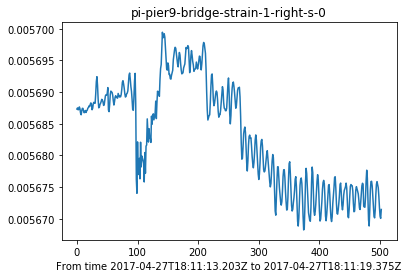

2017-04-27T18:11:40.904Z
2017-04-27T18:11:53.941Z


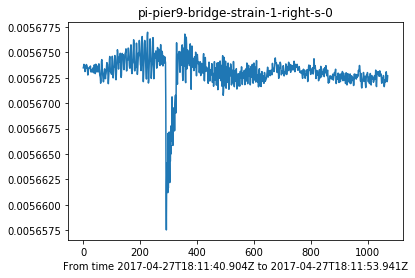

2017-04-27T18:11:58.071Z
2017-04-27T18:12:15.240Z


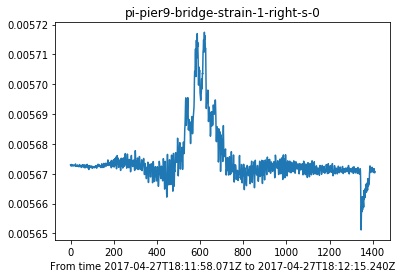

2017-04-27T18:13:40.206Z
2017-04-27T18:13:50.476Z


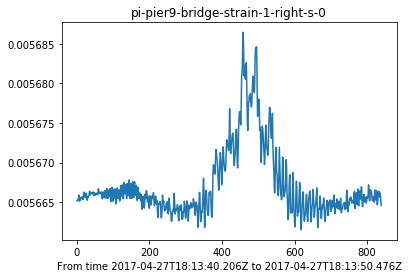

2017-04-27T18:17:33.830Z
2017-04-27T18:17:48.155Z


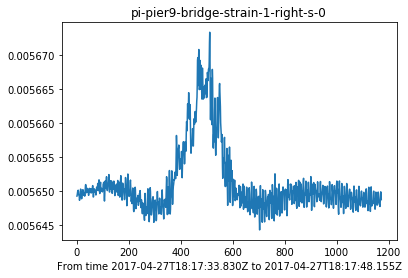

2017-04-27T18:18:36.208Z
2017-04-27T18:18:51.505Z


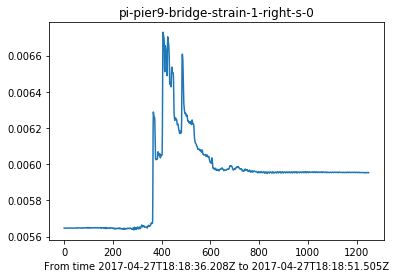

2017-04-27T18:26:41.416Z
2017-04-27T18:26:52.656Z


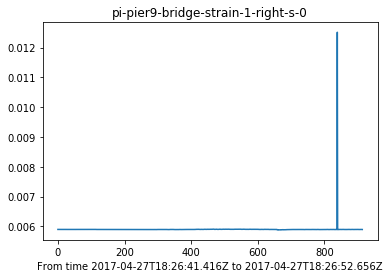

2017-04-27T18:29:31.395Z
2017-04-27T18:29:40.544Z


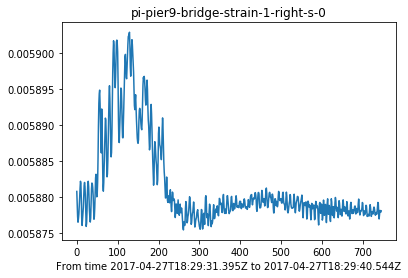

2017-04-27T18:35:24.206Z
2017-04-27T18:35:42.431Z


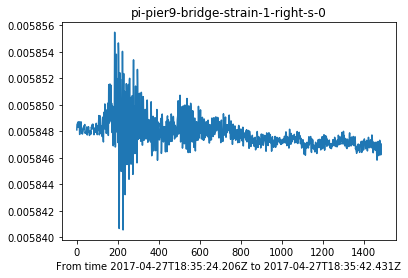

2017-04-27T18:36:09.234Z
2017-04-27T18:36:14.264Z


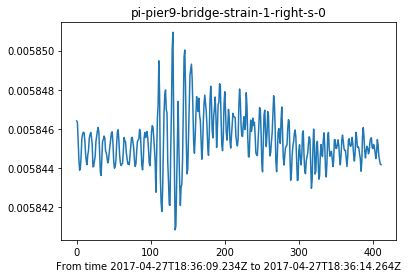

In [16]:
#Get strain tss data from the data base
strain_sensor_name = 'pi-pier9-bridge-strain-1-right-s-0'
strain_tss = rd.readStrainFromLocal(strain_file_name, strain_sensor_name)


strain_tss.addMaskByMaskTimeSeriesSeg(mask_all, msk_name)
strain_tss_lst = strain_tss.applyMaskByName(msk_name)

for i in range(10):
    print strain_tss_lst[i].getStartTime()
    print strain_tss_lst[i].getEndTime()
    strain_tss_lst[i].plotY()